In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import colors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Dataset :
df = pd.read_csv('new.csv')
df.shape

(2240, 29)

In [3]:
df.head

<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012      

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#Income has missing Values -- So Removing NA Vlaues 

data = df.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [9]:
#creating a feature out of Dt_customer

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i) 

#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [10]:
# Created a Feature 

days = []

d1 = max(dates) #Newest customer

for i in dates:
    delta = d1-i
    days.append(delta)
    
data['Customer_for'] = days
data['Customer_for']= pd.to_numeric(data['Customer_for'],errors = 'coerce')

In [11]:
# Exploring the Categorical values

print("Total categoreis in the Feature Marital_Status:\n",data['Marital_Status'].value_counts(),'\n')
print("Total categoreis in the Feature Education:\n",data['Education'].value_counts(),'\n')

Total categoreis in the Feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categoreis in the Feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



In [12]:
#Feature Engineering

#Age of the Customer Today

data['Age']= 2021-data['Year_Birth']


#Total Spendings on items

data['Spent']=  data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
    
#Deriving living status bu marital

data['Living_With'] = data['Marital_Status'].replace({'Married': 'Partner',
                                                     'Together':'Partner',
                                                     'Absurd':'Alone',
                                                     'Widow':'Alone',
                                                     'YOLO':'Alone',
                                                     'Divorced':'Alone',
                                                     'Single':'Alone'})

#Feature Indication Total childerenIn the Household

data['Children']=data['Kidhome']+data['Teenhome']

# Compute Family_Size
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner': 2}) 
+ pd.to_numeric(data['Children'], errors='coerce').fillna(0)
data['Family_Size'] = pd.to_numeric(data['Family_Size'])

#Feature showing parenthood

data['Is_Parent']= np.where(data.Children>0,1,0)

#Segmenting Education in 3 Groups

data['Education']=data['Education'].replace({'Basic':"Undergraduate",
                                            '2n Cycle':'Undergraduate',
                                            'Graduation':'Graduate',
                                            'Master':'PostGraduate',
                                            'PhD':'PostGraduate'})


#for Clarity

data = data.rename(columns={'MntWines':'Wine',
                           'MntFruits':'Fruits',
                           'MntMeatProducts':'MeatMntFishProducts',
                           'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweet',
                            'MntGoldProds':'Gold'
                           })

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [13]:
data.describe()

Income      Kidhome     Teenhome      Recency         Wine  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits  MeatMntFishProducts         Fish        Sweet  \
count  2216.000000          2216.000000  2216.000000  2216.000000   
mean     26.356047           166.995939    37.637635    27.028881   
std      39.793917           224.283273    54.752082    41.072046   
min       0.000000             0.000000     0.000000     0.000000   
25%       2.000000            16.000000     3.000000     1.000000   
50%       8.000000            68.000000    12.000000     8.000000   
75%      33.000000           232.250000    50.000000    33.000000   
max     199.000000          1725.000000   259.000000   262.000000   

              Gold  ...  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count  2216.000000  ...   2216.000000   2216.000000  2216.000000  2216.000000   
mean     43.965253  ...      0.064079      0.013538     0.009477     0.150271   
std      51.815414  ...      0.244950      0.115588     0.096907     0.357417   
min       0.000000  ...      0.000000      0.000000     0.000000     0.000000   
25%       9.000000  ...      0.000000      0.000000     0.000000     0.000000   
50%      24.500000  ...      0.000000      0.000000     0.000000     0.000000   
75%      56.000000  ...      0.000000      0.000000     0.000000     0.000000   
max     321.000000  ...      1.000000      1.000000     1.000000     1.000000   

       Customer_for          Age        Spent     Children  Family_Size  \
count  2.216000e+03  2216.000000  2216.000000  2216.000000  2216.000000   
mean   4.423735e+16    52.179603   607.075361     0.947202     1.645307   
std    2.008532e+16    11.985554   602.900476     0.749062     0.478528   
min    0.000000e+00    25.000000     5.000000     0.000000     1.000000   
25%    2.937600e+16    44.000000    69.000000     0.000000     1.000000   
50%    4.432320e+16    51.000000   396.500000     1.000000     2.000000   
75%    5.927040e+16    62.000000  1048.000000     1.000000     2.000000   
max    9.184320e+16   128.000000  2525.000000     3.000000     2.000000   

         Is_Parent  
count  2216.000000  
mean      0.714350  
std       0.451825  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 28 columns]

In [14]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wine  Fruits  \
0      Graduate  58138.0        0         0       58   635      88   
1      Graduate  46344.0        1         1       38    11       1   
2      Graduate  71613.0        0         0       26   426      49   
3      Graduate  26646.0        1         0       26    11       4   
4  PostGraduate  58293.0        1         0       94   173      43   

   MeatMntFishProducts  Fish  Sweet  ...  AcceptedCmp2  Complain  Response  \
0                  546   172     88  ...             0         0         1   
1                    6     2      1  ...             0         0         0   
2                  127   111     21  ...             0         0         0   
3                   20    10      3  ...             0         0         0   
4                  118    46     27  ...             0         0         0   

        Customer_for  Age  Spent  Living_With  Children  Family_Size  \
0  83894400000000000   64   1617        Alone         0            1   
1  10800000000000000   67     27        Alone         2            1   
2  40780800000000000   56    776      Partner         0            2   
3   5616000000000000   37     53      Partner         1            2   
4  27734400000000000   40    422      Partner         1            2   

   Is_Parent  
0          0  
1          1  
2          0  
3          1  
4          1  

[5 rows x 30 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

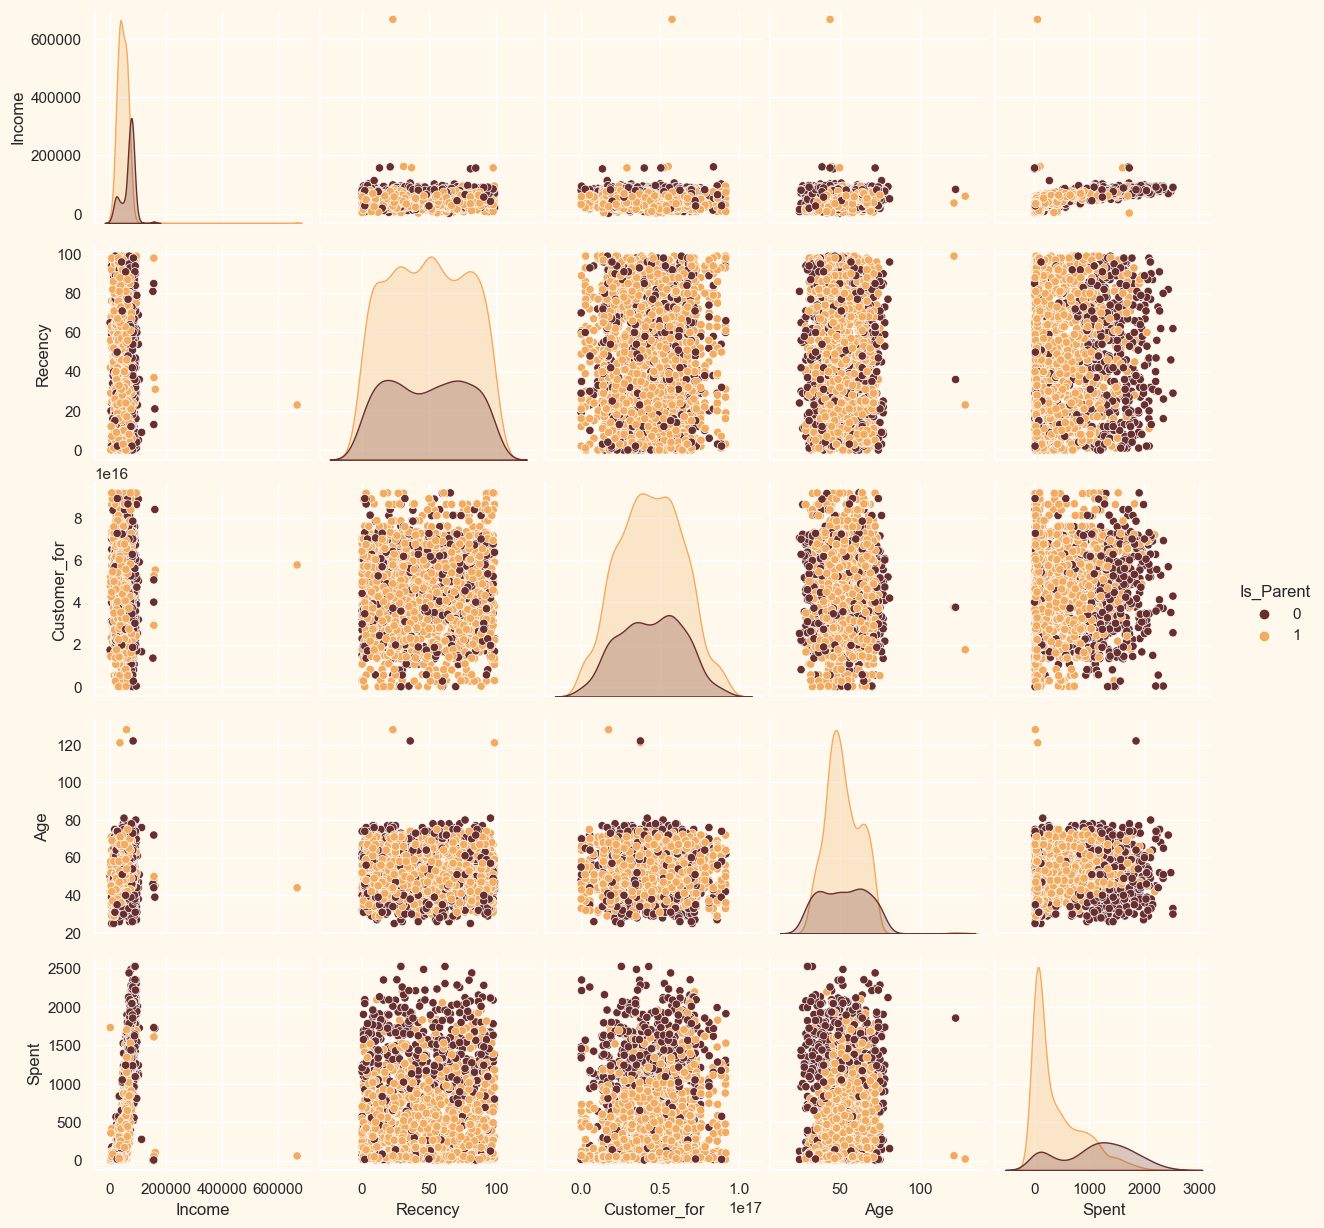

In [15]:
#To plot some selected features 
#Setting up colors prefrences
sb.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_for", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()

sb.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [16]:
#Since there are outliers in the above plot : 

data = data[(data['Age']< 90)]
data = data[(data['Income'] < 400000)]

<AxesSubplot:>

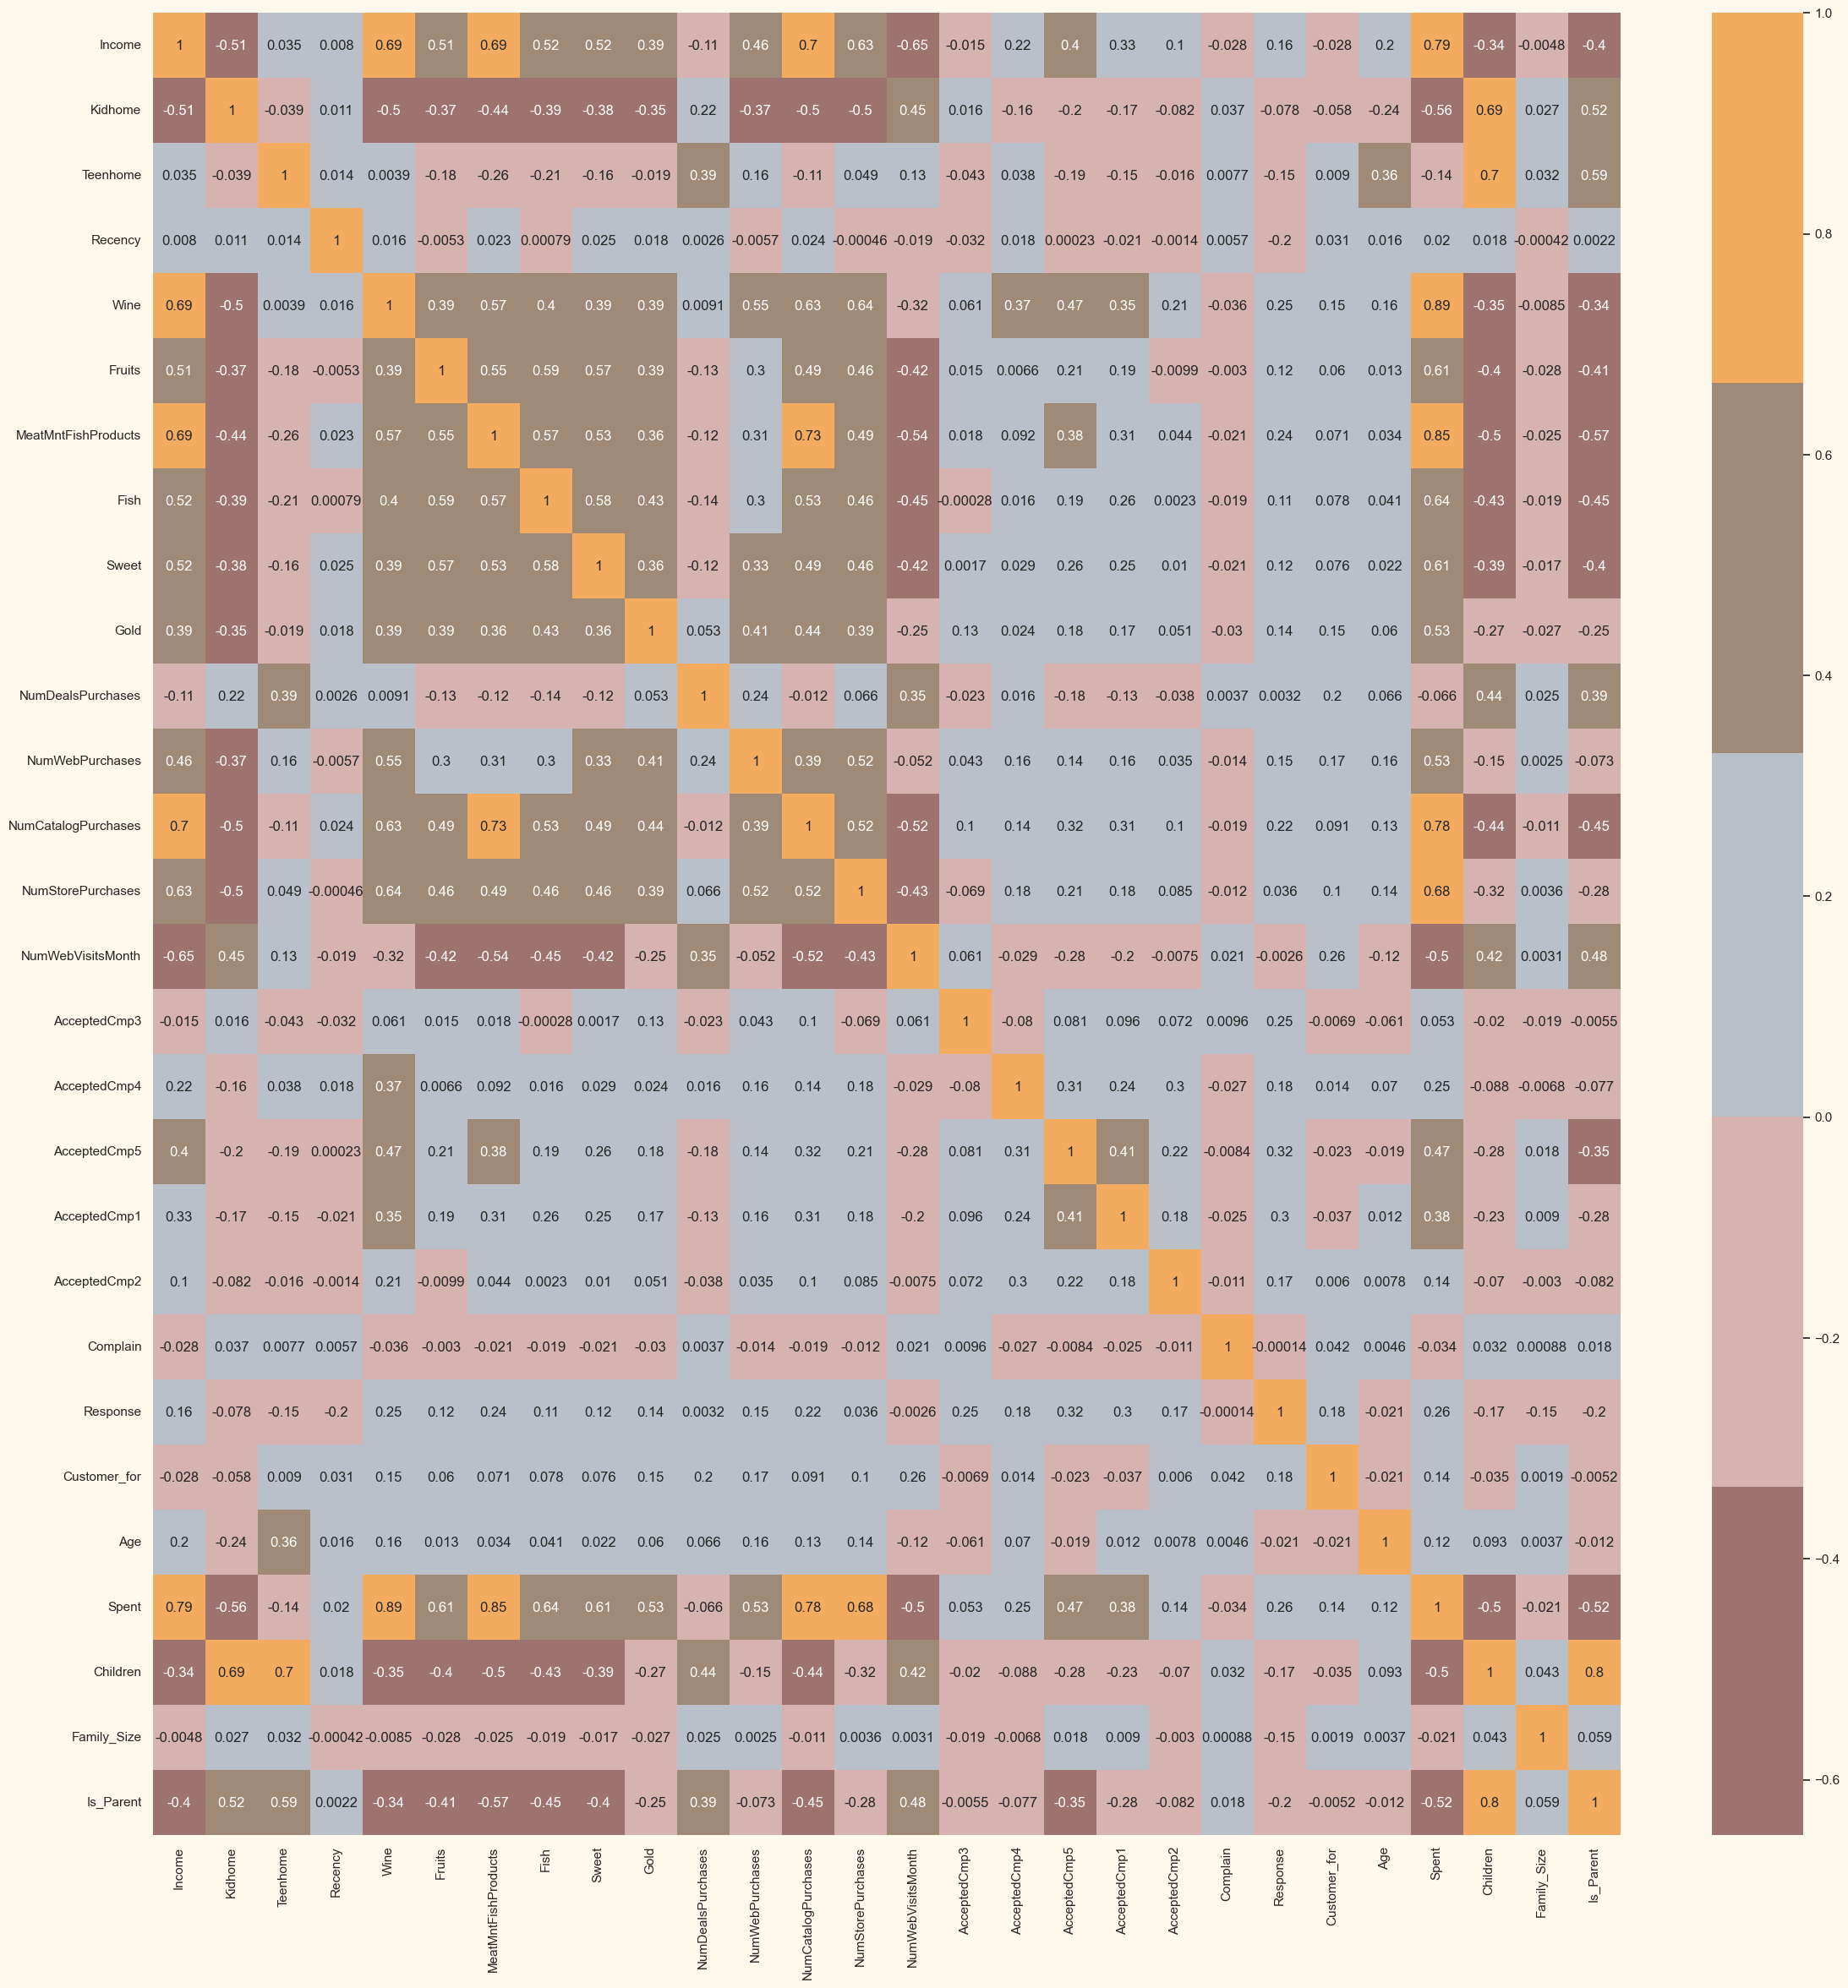

In [17]:
# correlation Matrix

correlation = data.corr()
plt.figure(figsize = (28,28))
sb.heatmap(correlation , annot = True, cmap = cmap, center = 0)

#Data Preprocessing : 
The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.


DATA PREPROCESSING

In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [18]:
#list of Categorical Variables : 
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print(object_cols)


['Education', 'Living_With']


In [19]:
label_encode = LabelEncoder()
for i in object_cols : 
    data[i] = data[[i]].apply(label_encode.fit_transform)
    
print('Successful in Transforming Data')

Successful in Transforming Data


In [20]:
#Making copy of data : 

ds =data.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [21]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency      Wine    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

   MeatMntFishProducts      Fish     Sweet  ...  NumCatalogPurchases  \
0             1.690293  2.453472  1.483713  ...             2.503607   
1            -0.718230 -0.651004 -0.634019  ...            -0.571340   
2            -0.178542  1.339513 -0.147184  ...            -0.229679   
3            -0.655787 -0.504911 -0.585335  ...            -0.913000   
4            -0.218684  0.152508 -0.001133  ...             0.111982   

   NumStorePurchases  NumWebVisitsMonth  Customer_for       Age     Spent  \
0          -0.555814           0.692181      1.973583  1.018352  1.676245   
1          -1.171160          -0.132545     -1.665144  1.274785 -0.963297   
2           1.290224          -0.544908     -0.172664  0.334530  0.280110   
3          -0.555814           0.279818     -1.923210 -1.289547 -0.920135   
4           0.059532          -0.132545     -0.822130 -1.033114 -0.307562   

   Living_With  Children  Family_Size  Is_Parent  
0    -1.349603 -1.264598    -1.349603  -1.581139  
1    -1.349603  1.404572    -1.349603   0.632456  
2     0.740959 -1.264598     0.740959  -1.581139  
3     0.740959  0.069987     0.740959   0.632456  
4     0.740959  0.069987     0.740959   0.632456  

[5 rows x 23 columns]

In [22]:
#Dimensionality Reduction using PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds),columns = (['col1','col2','col3']))

PCA_ds.describe()

col1          col2          col3
count  2.212000e+03  2.212000e+03  2.212000e+03
mean  -1.455537e-16  5.019091e-18  1.093660e-16
std    2.815384e+00  1.615789e+00  1.411460e+00
min   -5.697312e+00 -3.782863e+00 -1.610764e+00
25%   -2.575632e+00 -1.315562e+00 -1.123239e+00
50%   -8.080640e-01 -1.835354e-01 -8.481003e-01
75%    2.377425e+00  1.209692e+00  1.723569e+00
max    7.496810e+00  5.639559e+00  2.586516e+00

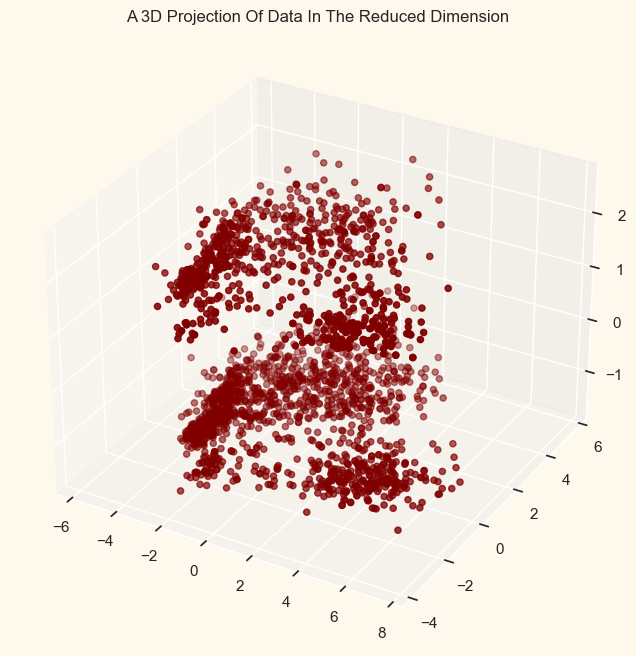

In [23]:
#3d Projection of the PCA reduction

#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


In [24]:
#dataset used now : 
PCA_ds.head()

col1      col2      col3
0  4.718135 -0.029898  2.004168
1 -2.834320 -0.048128  1.904901
2  2.500116 -0.718384 -1.158793
3 -2.688678 -1.533990 -1.230050
4 -0.556415  0.103349 -1.086205

In [25]:
#Clustering
# !pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

Elbow Method to determine the number of clusters to be formed:


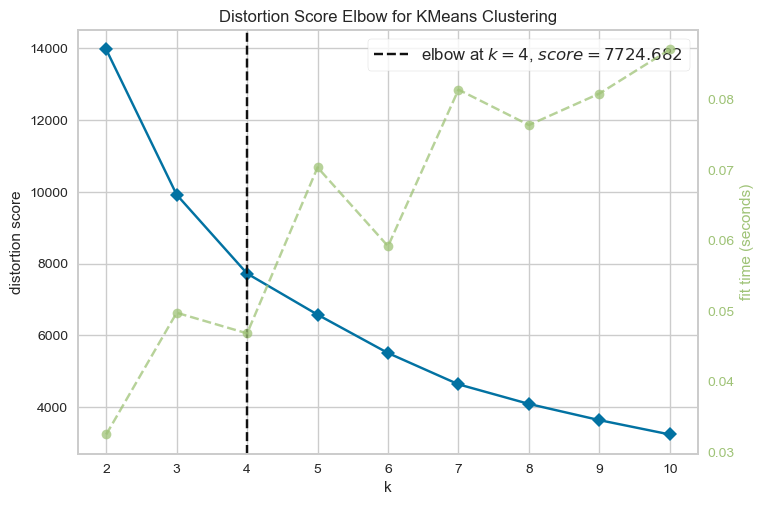

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [27]:
#Agglomerative Clustering : 

AC = AgglomerativeClustering(n_clusters = 4)

# Fitting model
yhat_AC = AC.fit_predict(PCA_ds)

PCA_ds["Clusters"] = yhat_AC


# original_dataframe
data['Clusters'] = yhat_AC

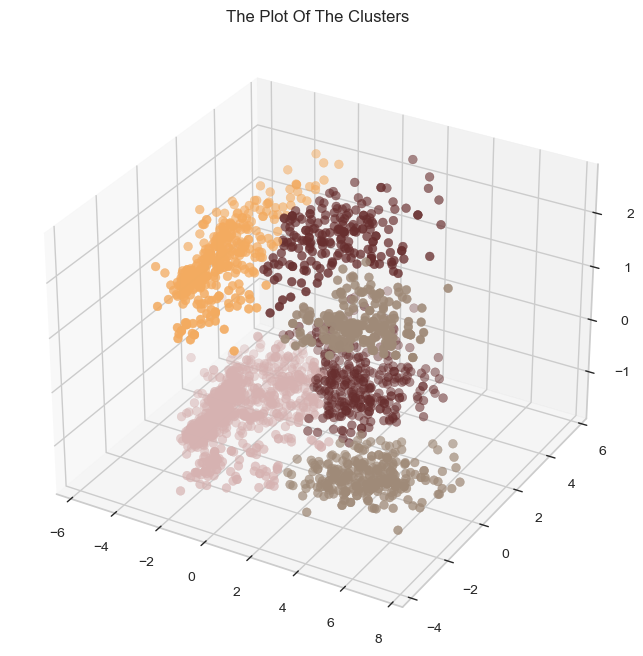

In [28]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

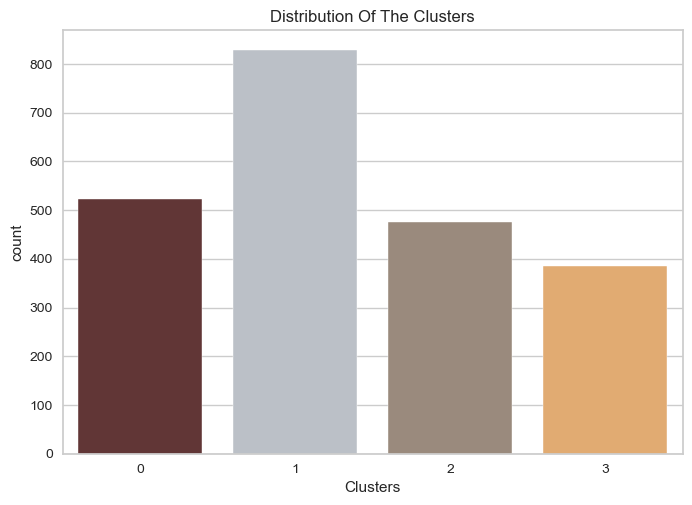

In [29]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sb.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

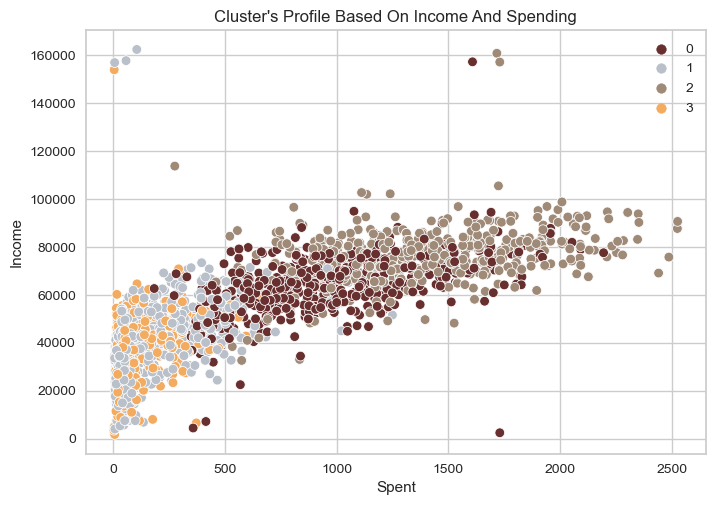

In [30]:
pl = sb.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

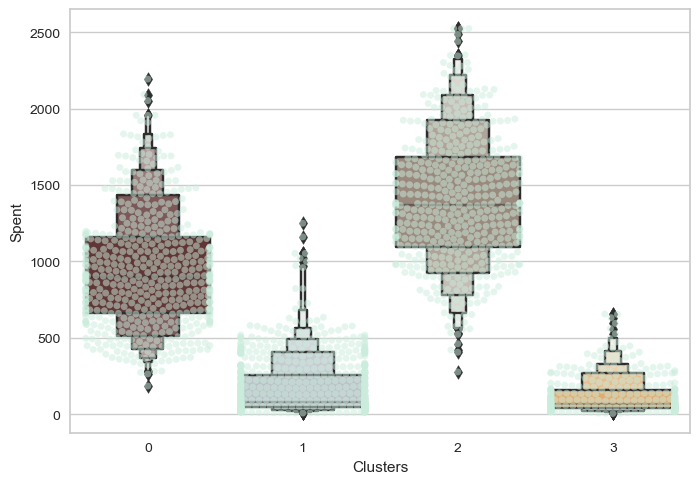

In [31]:
#Products

plt.figure()
pl=sb.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sb.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

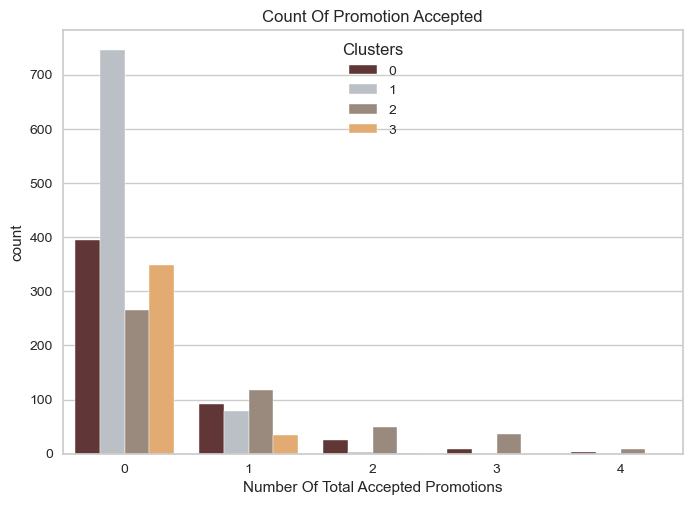

In [32]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sb.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

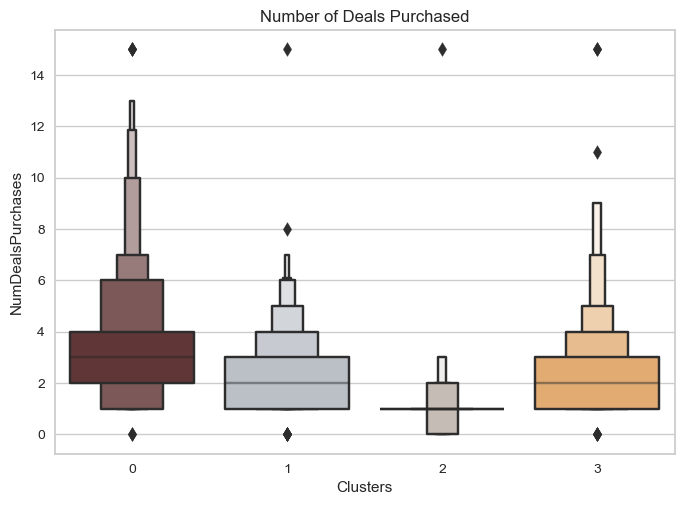

In [33]:
#Plotting the number of deals purchased
plt.figure()
pl=sb.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

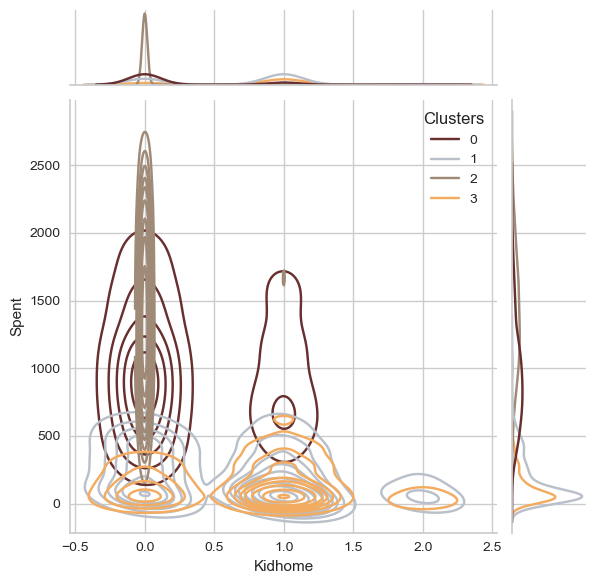

<Figure size 800x550 with 0 Axes>

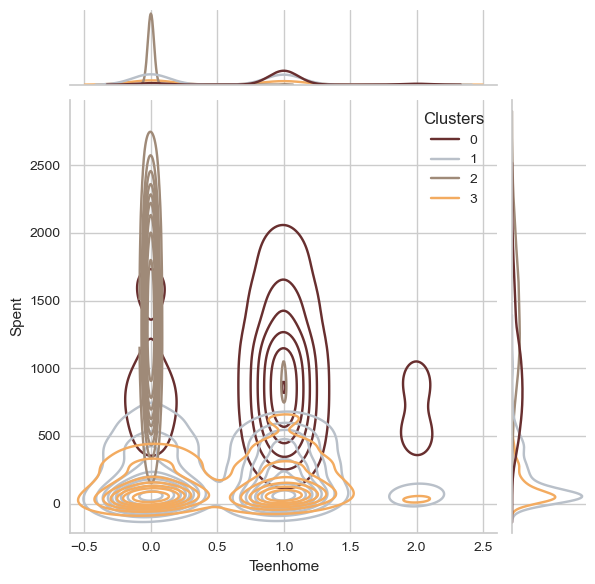

<Figure size 800x550 with 0 Axes>

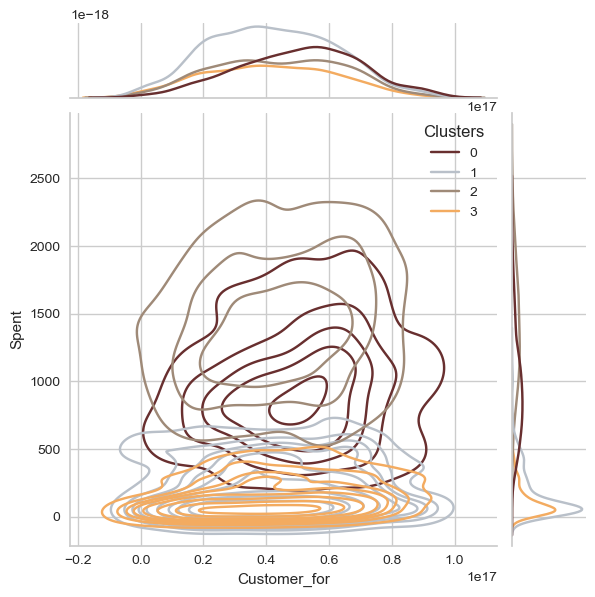

<Figure size 800x550 with 0 Axes>

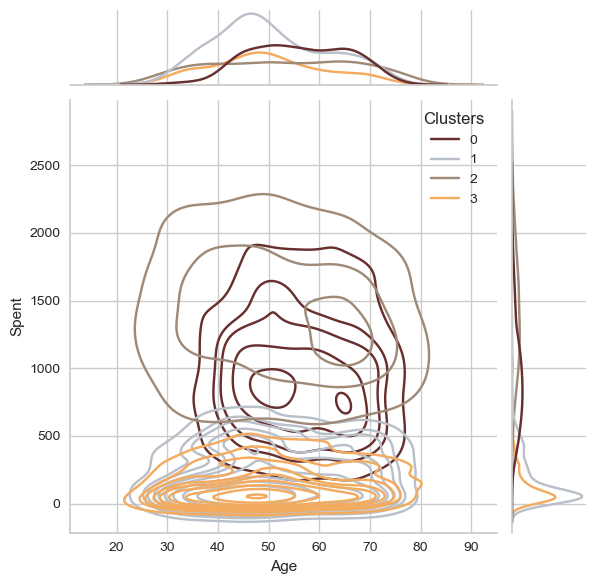

<Figure size 800x550 with 0 Axes>

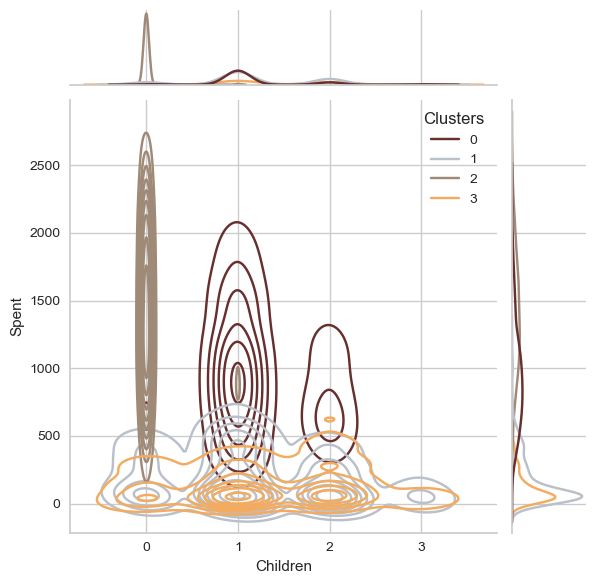

<Figure size 800x550 with 0 Axes>

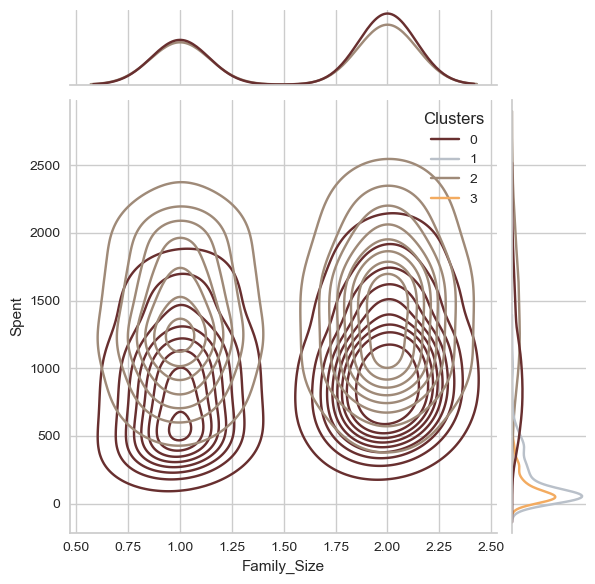

<Figure size 800x550 with 0 Axes>

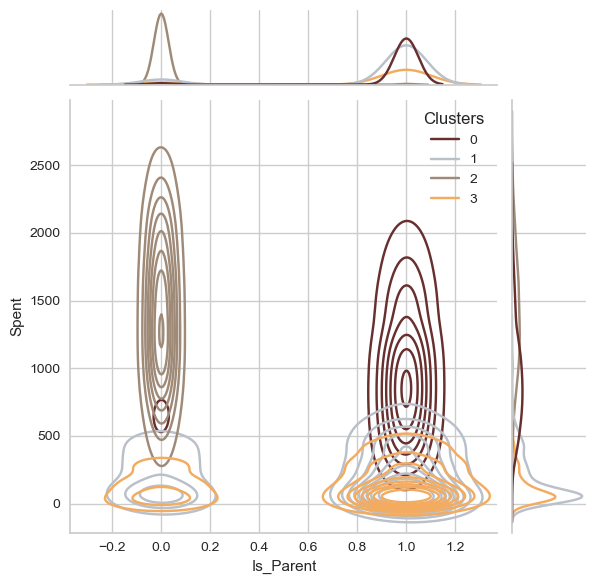

<Figure size 800x550 with 0 Axes>

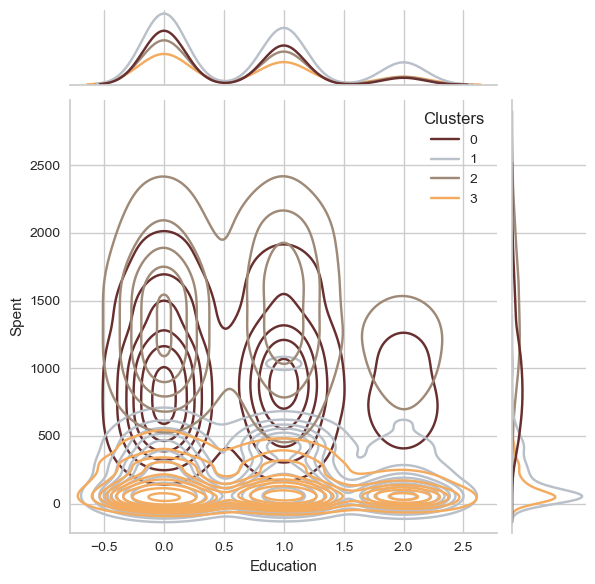

<Figure size 800x550 with 0 Axes>

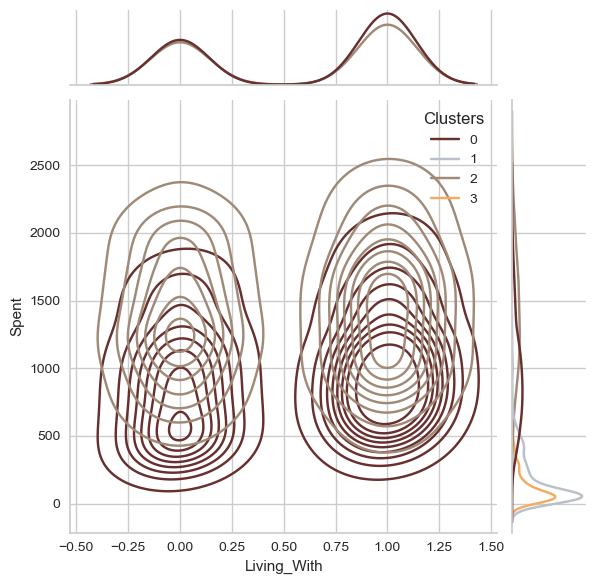

In [34]:
Personal = [ "Kidhome","Teenhome","Customer_for", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sb.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()